### **Business Problem Definition:**

An company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve decided that the behavior of new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers.

### As a business analyst you are required to `help the manager to predict the right group allocation` of the new customers.

Variables Description

ID --	Unique ID

Gender	-- Gender of the customer

Ever_Married	-- Marital status of the customer

Age	-- Age of the customer

Graduated	-- Is the customer a graduate?

Profession	-- Profession of the customer

Work_Experience	-- Work Experience in years

Spending_Score	-- Spending score of the customer

Family_Size	-- Number of family members for the customer(including the customer)

Var_1	-- Anonymised Category for the customer

Segmentation(target)	-- Customer Segment of the customer

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the train data
df = pd.read_csv('Train.csv')

# Looking top 10 rows
df.head(10)

ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   
5  461319    Male          Yes   56        No         Artist              0.0   
6  460156    Male           No   32       Yes     Healthcare              1.0   
7  464347  Female           No   33       Yes     Healthcare              1.0   
8  465015  Female          Yes   61       Yes       Engineer              0.0   
9  465176  Female          Yes   55       Yes         Artist              1.0   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A  
5        Average          2.0  Cat_6            C  
6            Low          3.0  Cat_6            C  
7            Low          3.0  Cat_6            D  
8            Low          3.0  Cat_7            D  
9        Average          4.0  Cat_6            C

In [3]:
print ('Number of samples: ',len(df))

Number of samples:  8068


In [4]:
# Looking the bigger picture
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [5]:
def fill_missing_values(df):
    # Replace missing values for numeric columns with median
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        df[col].fillna(df[col].median(), inplace=True)

    # Replace missing values for categorical columns with mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)

    # Check if all missing values are filled
    if df.isnull().sum().sum() == 0:
        print("All missing values have been replaced.")
    else:
        print("Some missing values remain.")

    return df


In [6]:
df = fill_missing_values(df)
df.isnull().sum()

All missing values have been replaced.


ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   object 
 5   Profession       8068 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      8068 non-null   float64
 9   Var_1            8068 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [9]:
dfOnlyFeatures = df.drop(columns=['Segmentation', 'ID'])

# Verify the structure of the new dataframe
dfOnlyFeatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     8068 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        8068 non-null   object 
 4   Profession       8068 non-null   object 
 5   Work_Experience  8068 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      8068 non-null   float64
 8   Var_1            8068 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 567.4+ KB


In [10]:
# Dummification of categorical variables
# Dummify (One-Hot Encode) the categorical variables
df_dummified = pd.get_dummies(dfOnlyFeatures)

# Display the first few rows of the dummified dataset
df_dummified.head()

Age  Work_Experience  Family_Size  Gender_Female  Gender_Male  \
0   22              1.0          4.0          False         True   
1   38              1.0          3.0           True        False   
2   67              1.0          1.0           True        False   
3   67              0.0          2.0          False         True   
4   40              1.0          6.0           True        False   

   Ever_Married_No  Ever_Married_Yes  Graduated_No  Graduated_Yes  \
0             True             False          True          False   
1            False              True         False           True   
2            False              True         False           True   
3            False              True         False           True   
4            False              True         False           True   

   Profession_Artist  ...  Spending_Score_Average  Spending_Score_High  \
0              False  ...                   False                False   
1              False  ...                    True                False   
2              False  ...                   False                False   
3              False  ...                   False                 True   
4              False  ...                   False                 True   

   Spending_Score_Low  Var_1_Cat_1  Var_1_Cat_2  Var_1_Cat_3  Var_1_Cat_4  \
0                True        False        False        False         True   
1               False        False        False        False         True   
2                True        False        False        False        False   
3               False        False        False        False        False   
4               False        False        False        False        False   

   Var_1_Cat_5  Var_1_Cat_6  Var_1_Cat_7  
0        False        False        False  
1        False        False        False  
2        False         True        False  
3        False         True        False  
4        False         True        False  

[5 rows x 28 columns]

In [11]:
df1 = df_dummified.copy()
df1.head()


Age  Work_Experience  Family_Size  Gender_Female  Gender_Male  \
0   22              1.0          4.0          False         True   
1   38              1.0          3.0           True        False   
2   67              1.0          1.0           True        False   
3   67              0.0          2.0          False         True   
4   40              1.0          6.0           True        False   

   Ever_Married_No  Ever_Married_Yes  Graduated_No  Graduated_Yes  \
0             True             False          True          False   
1            False              True         False           True   
2            False              True         False           True   
3            False              True         False           True   
4            False              True         False           True   

   Profession_Artist  ...  Spending_Score_Average  Spending_Score_High  \
0              False  ...                   False                False   
1              False  ...                    True                False   
2              False  ...                   False                False   
3              False  ...                   False                 True   
4              False  ...                   False                 True   

   Spending_Score_Low  Var_1_Cat_1  Var_1_Cat_2  Var_1_Cat_3  Var_1_Cat_4  \
0                True        False        False        False         True   
1               False        False        False        False         True   
2                True        False        False        False        False   
3               False        False        False        False        False   
4               False        False        False        False        False   

   Var_1_Cat_5  Var_1_Cat_6  Var_1_Cat_7  
0        False        False        False  
1        False        False        False  
2        False         True        False  
3        False         True        False  
4        False         True        False  

[5 rows x 28 columns]

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       8068 non-null   int64  
 1   Work_Experience           8068 non-null   float64
 2   Family_Size               8068 non-null   float64
 3   Gender_Female             8068 non-null   bool   
 4   Gender_Male               8068 non-null   bool   
 5   Ever_Married_No           8068 non-null   bool   
 6   Ever_Married_Yes          8068 non-null   bool   
 7   Graduated_No              8068 non-null   bool   
 8   Graduated_Yes             8068 non-null   bool   
 9   Profession_Artist         8068 non-null   bool   
 10  Profession_Doctor         8068 non-null   bool   
 11  Profession_Engineer       8068 non-null   bool   
 12  Profession_Entertainment  8068 non-null   bool   
 13  Profession_Executive      8068 non-null   bool   
 14  Professi

In [24]:
# Label encode the target variable
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding on the 'Segmentation' column
df['Segmentation'] = label_encoder.fit_transform(df['Segmentation'])

# Mapping of original classes to encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

df1['Segmentation'] = df['Segmentation']
df1.head()

Age  Work_Experience  Family_Size  Gender_Female  Gender_Male  \
0   22              1.0          4.0          False         True   
1   38              1.0          3.0           True        False   
2   67              1.0          1.0           True        False   
3   67              0.0          2.0          False         True   
4   40              1.0          6.0           True        False   

   Ever_Married_No  Ever_Married_Yes  Graduated_No  Graduated_Yes  \
0             True             False          True          False   
1            False              True         False           True   
2            False              True         False           True   
3            False              True         False           True   
4            False              True         False           True   

   Profession_Artist  ...  Spending_Score_High  Spending_Score_Low  \
0              False  ...                False                True   
1              False  ...                False               False   
2              False  ...                False                True   
3              False  ...                 True               False   
4              False  ...                 True               False   

   Var_1_Cat_1  Var_1_Cat_2  Var_1_Cat_3  Var_1_Cat_4  Var_1_Cat_5  \
0        False        False        False         True        False   
1        False        False        False         True        False   
2        False        False        False        False        False   
3        False        False        False        False        False   
4        False        False        False        False        False   

   Var_1_Cat_6  Var_1_Cat_7  Segmentation  
0        False        False             3  
1        False        False             0  
2         True        False             1  
3         True        False             1  
4         True        False             0  

[5 rows x 29 columns]

In [25]:
print(label_mapping)

{0: 0, 1: 1, 2: 2, 3: 3}


In [16]:
# Separating dependent-independent variables
X = df1.drop(['Segmentation'], axis=1)
y = df1['Segmentation']
X.head(2)

Age  Work_Experience  Family_Size  Gender_Female  Gender_Male  \
0   22              1.0          4.0          False         True   
1   38              1.0          3.0           True        False   

   Ever_Married_No  Ever_Married_Yes  Graduated_No  Graduated_Yes  \
0             True             False          True          False   
1            False              True         False           True   

   Profession_Artist  ...  Spending_Score_Average  Spending_Score_High  \
0              False  ...                   False                False   
1              False  ...                    True                False   

   Spending_Score_Low  Var_1_Cat_1  Var_1_Cat_2  Var_1_Cat_3  Var_1_Cat_4  \
0                True        False        False        False         True   
1               False        False        False        False         True   

   Var_1_Cat_5  Var_1_Cat_6  Var_1_Cat_7  
0        False        False        False  
1        False        False        False  

[2 rows x 28 columns]

In [29]:
# import the train-test split
from sklearn.model_selection import train_test_split

# divide into train and test sets
trainX, testX, train_y, test_y = train_test_split(X,y, train_size = 0.8, random_state = 101, stratify=y)
trainX.shape, trainY.shape, testX.shape, testY.shape

((6454, 28), (6454,), (1614, 28), (1614,))

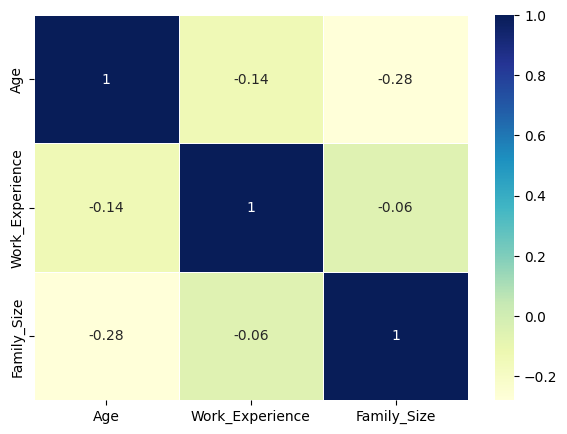

In [30]:
# Correlation matrix
# Select numeric columns (float64 and int64 types) from the dataset
numeric_cols = df1.drop(columns=['Segmentation']).select_dtypes(include=['float64', 'int64']).columns
# Extract only numeric columns into a new dataframe
df_numeric_only = df1[numeric_cols]

plt.figure(figsize=(7,5))
sns.heatmap(df_numeric_only.corr(method='spearman').round(2),linewidth = 0.5,annot=True,cmap="YlGnBu")
plt.show()


**Model Building**

In [32]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb1 = GaussianNB()

# Train model
model_nb1 = gnb1.fit(trainX, train_y)

# Predicting the classes
yhat3 = gnb1.predict(trainX)

from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(train_y.values, yhat3, labels=[0,1,2,3])
print('\n\n-------The confusion matrix for this model is-------')
print(cm3)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_y.values, yhat3))




-------The confusion matrix for this model is-------
[[ 534  233  464  347]
 [ 288  310  710  178]
 [ 110  164 1088  214]
 [ 310  137  135 1232]]


-------Printing the whole report of the model-------
              precision    recall  f1-score   support

           0       0.43      0.34      0.38      1578
           1       0.37      0.21      0.27      1486
           2       0.45      0.69      0.55      1576
           3       0.63      0.68      0.65      1814

    accuracy                           0.49      6454
   macro avg       0.47      0.48      0.46      6454
weighted avg       0.48      0.49      0.47      6454



In [33]:
test_nb1_x = testX.copy()
test_nb1_x.head()

Age  Work_Experience  Family_Size  Gender_Female  Gender_Male  \
4463   18              1.0          3.0           True        False   
1687   38              0.0          3.0          False         True   
5694   43              0.0          2.0           True        False   
7390   63              0.0          2.0           True        False   
1347   35              1.0          1.0           True        False   

      Ever_Married_No  Ever_Married_Yes  Graduated_No  Graduated_Yes  \
4463             True             False          True          False   
1687            False              True          True          False   
5694             True             False          True          False   
7390            False              True          True          False   
1347             True             False         False           True   

      Profession_Artist  ...  Spending_Score_Average  Spending_Score_High  \
4463              False  ...                   False                False   
1687              False  ...                   False                 True   
5694              False  ...                   False                False   
7390               True  ...                   False                 True   
1347              False  ...                   False                False   

      Spending_Score_Low  Var_1_Cat_1  Var_1_Cat_2  Var_1_Cat_3  Var_1_Cat_4  \
4463                True        False        False         True        False   
1687               False        False        False        False        False   
5694                True        False        False        False         True   
7390               False        False        False        False        False   
1347                True        False        False        False         True   

      Var_1_Cat_5  Var_1_Cat_6  Var_1_Cat_7  
4463        False        False        False  
1687        False         True        False  
5694        False        False        False  
7390        False         True        False  
1347        False        False        False  

[5 rows x 28 columns]

In [34]:
test_nb1_y = test_y.copy()
test_nb1_y.head()

4463    3
1687    2
5694    3
7390    1
1347    3
Name: Segmentation, dtype: int64

In [35]:
#  apply gnb1 prediction on test_nb1_x

y_nb1 = gnb1.predict(test_nb1_x)
y_nb1


array([3, 1, 3, ..., 1, 1, 0])

In [36]:
pd.Series(y_nb1).value_counts()

2    569
3    517
0    321
1    207
Name: count, dtype: int64

In [38]:
from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------\n')
print(confusion_matrix(test_nb1_y.values, y_nb1, labels=[0,1,2,3]))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------\n')
print(classification_report(test_nb1_y.values, y_nb1))

-------The confusion matrix for test data is-------

[[147  54 113  80]
 [ 78  72 167  55]
 [ 28  44 253  69]
 [ 68  37  36 313]]


-------Printing the report of test data-------

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       394
           1       0.35      0.19      0.25       372
           2       0.44      0.64      0.53       394
           3       0.61      0.69      0.64       454

    accuracy                           0.49      1614
   macro avg       0.46      0.47      0.46      1614
weighted avg       0.47      0.49      0.47      1614



**Model Evaluation**

In [40]:
print('************************  MODEL-1 REPORT  *********************************\n')
print('Train data')
print(classification_report(train_y.values, yhat3))
print('\nTest data')
print(classification_report(test_nb1_y.values, y_nb1))

************************  MODEL-1 REPORT  *********************************

Train data
              precision    recall  f1-score   support

           0       0.43      0.34      0.38      1578
           1       0.37      0.21      0.27      1486
           2       0.45      0.69      0.55      1576
           3       0.63      0.68      0.65      1814

    accuracy                           0.49      6454
   macro avg       0.47      0.48      0.46      6454
weighted avg       0.48      0.49      0.47      6454


Test data
              precision    recall  f1-score   support

           0       0.46      0.37      0.41       394
           1       0.35      0.19      0.25       372
           2       0.44      0.64      0.53       394
           3       0.61      0.69      0.64       454

    accuracy                           0.49      1614
   macro avg       0.46      0.47      0.46      1614
weighted avg       0.47      0.49      0.47      1614



**Analysis of the Results**
The confusion matrix shown in the image provides key insights into the performance of the GNB model:

For Train Data:
The F1 scores indicate that Segment D is classified the best, while Segment B performs the worst with a recall of 0.21.

Fo Test Data:
Accuracy: 0.49 (same as the train data, which shows the model is not overfitting or underfitting drastically)

Key Takeaways:

--Segment D: The model performs best on this segment, achieving high precision, recall, and F1-scores in both the train and test sets.

--Segment B: This segment is the weakest, with very low recall and F1-score, which means the model is struggling to correctly identify and predict this group.

--Overall Accuracy: With an accuracy of 49%, the model isn't performing exceptionally well but is providing useful predictions, especially for Segment D and C.


### In-Class Activity 3: Predict Class Probabilities with Gaussian Naive Bayes
- Objective: Train a Gaussian Naive Bayes model and predict the probability of each class for a few instances.

#### Steps for the Activity:
`Train the Model:`
- Train the Gaussian Naive Bayes model on the training data.`

`Predict Class Probabilities:`
- Use the trained model to predict class probabilities for a few instances from the test set.

`Interpret the Probabilities:`
- Print the predicted probabilities and discuss how confident the model is for each class.

`Hint:` mean (`theta_`) and variance (`var_`) can be extracted from the model object.

In [43]:
## Solution:

import numpy as np
from sklearn.naive_bayes import GaussianNB

# Step 1: Train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(trainX, train_y)

# Step 2: Extract the mean and variance of each feature learned by the model
means = gnb.theta_  # Mean of each feature per class
variances = gnb.var_  # Variance of each feature per class

# Step 3: Display the means and variances for analysis
print("Feature Means per Class:")
print(means)

print("\nFeature Variances per Class:")
print(variances)

# Step 4: Brief Interpretation
# Learners should compare how much each feature varies across the classes to identify important features.


Feature Means per Class:
[[4.50114068e+01 2.69645120e+00 2.45944233e+00 4.59442332e-01
  5.40557668e-01 4.03675539e-01 5.96324461e-01 3.75792142e-01
  6.24207858e-01 3.00380228e-01 1.02661597e-01 1.26742712e-01
  1.84410646e-01 6.08365019e-02 5.64005070e-02 3.67553866e-02
  1.00760456e-01 3.10519645e-02 1.75538657e-01 1.41318124e-01
  6.83143219e-01 1.58428390e-02 4.24588086e-02 1.11533587e-01
  1.68567807e-01 1.07731305e-02 6.25475285e-01 2.53485425e-02]
 [4.83371467e+01 2.20390310e+00 2.69986541e+00 4.48855989e-01
  5.51144011e-01 2.52355316e-01 7.47644684e-01 2.65814266e-01
  7.34185734e-01 4.20592194e-01 7.40242261e-02 1.00942127e-01
  1.16419919e-01 1.03633917e-01 5.31628533e-02 2.96096904e-02
  8.61372813e-02 1.54777927e-02 3.18304172e-01 2.07940781e-01
  4.73755047e-01 1.48048452e-02 5.58546433e-02 9.82503365e-02
  1.17092867e-01 1.00942127e-02 6.79676985e-01 2.42261104e-02]
 [4.90697970e+01 2.14784264e+00 2.97144670e+00 4.62563452e-01
  5.37436548e-01 1.97969543e-01 8.02030457e

# **Logistic Regression**

In [ ]:
import pandas as pd

# Load the uploaded CSV files
train_file_path = 'Train.csv'
test_file_path = 'Test.csv'

# Reading the train and test datasets
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Display the first few rows of the datasets to understand their structure
train_data.head(), test_data.head()

(       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
 0  462809    Male           No   22        No     Healthcare              1.0   
 1  462643  Female          Yes   38       Yes       Engineer              NaN   
 2  466315  Female          Yes   67       Yes       Engineer              1.0   
 3  461735    Male          Yes   67       Yes         Lawyer              0.0   
 4  462669  Female          Yes   40       Yes  Entertainment              NaN   
 
   Spending_Score  Family_Size  Var_1 Segmentation  
 0            Low          4.0  Cat_4            D  
 1        Average          3.0  Cat_4            A  
 2            Low          1.0  Cat_6            B  
 3           High          2.0  Cat_6            B  
 4           High          6.0  Cat_6            A  ,
        ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
 0  458989  Female          Yes   36       Yes    Engineer              0.0   
 1  458994    Male          Y

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Preprocessing the data
def preprocess_data(data, is_train=True):
    # Dropping ID column as it's not relevant
    data = data.drop(columns=['ID'])

    # Handling missing values using SimpleImputer
    imputer = SimpleImputer(strategy='most_frequent')
    data[['Work_Experience', 'Family_Size']] = imputer.fit_transform(data[['Work_Experience', 'Family_Size']])

    # Encoding categorical variables
    encoder = LabelEncoder()
    data['Gender'] = encoder.fit_transform(data['Gender'])
    data['Ever_Married'] = encoder.fit_transform(data['Ever_Married'])
    data['Graduated'] = encoder.fit_transform(data['Graduated'])
    data['Profession'] = encoder.fit_transform(data['Profession'].astype(str))
    data['Spending_Score'] = encoder.fit_transform(data['Spending_Score'])
    data['Var_1'] = encoder.fit_transform(data['Var_1'].astype(str))

    if is_train:
        # Encode the target variable (Segmentation)
        data['Segmentation'] = encoder.fit_transform(data['Segmentation'])

    return data

# Preprocess train and test datasets
train_data_processed = preprocess_data(train_data)
test_data_processed = preprocess_data(test_data, is_train=False)

# Splitting features and target variable for the train dataset
X_train = train_data_processed.drop(columns=['Segmentation'])
y_train = train_data_processed['Segmentation']

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(test_data_processed)

# Applying Logistic Regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)

# Predicting on the train and test data
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

# Calculating accuracy and classification report for train and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_train[:len(y_test_pred)], y_test_pred)

train_report = classification_report(y_train, y_train_pred, target_names=['A', 'B', 'C', 'D'])
test_report = classification_report(y_train[:len(y_test_pred)], y_test_pred, target_names=['A', 'B', 'C', 'D'])

# Printing the results
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print("\nTrain Classification Report:")
print(train_report)
print("\nTest Classification Report:")
print(test_report)




Train Accuracy: 0.4970252850768468
Test Accuracy: 0.26303768557289686

Train Classification Report:
              precision    recall  f1-score   support

           A       0.41      0.44      0.42      1972
           B       0.36      0.14      0.20      1858
           C       0.48      0.61      0.54      1970
           D       0.61      0.74      0.67      2268

    accuracy                           0.50      8068
   macro avg       0.47      0.48      0.46      8068
weighted avg       0.47      0.50      0.47      8068


Test Classification Report:
              precision    recall  f1-score   support

           A       0.27      0.28      0.28       670
           B       0.23      0.10      0.14       585
           C       0.24      0.31      0.27       629
           D       0.28      0.34      0.31       743

    accuracy                           0.26      2627
   macro avg       0.26      0.26      0.25      2627
weighted avg       0.26      0.26      0.25      2627



Observations:

- Accuracy(Training Data): 49.74%
  - Overall: The model performs better for Class C and D, similar to the Naive Bayes classifier. Class B remains the most challenging to predict accurately.
-Accuracy(Test Data): 26.30%

Comparison:
Logistic Regression:

- Training Accuracy: 49.74%
- Test Accuracy: 26.30%
- Test F1-Score (Class C): 0.27
- Test F1-Score (Class D): 0.31

Gaussian Naive Bayes:

- Training Accuracy: 48.72%
- Test Accuracy: 26.87%
- Test F1-Score (Class C): 0.29
- Test F1-Score (Class D): 0.32

Conclusion:

- Gaussian Naive Bayes outperforms Logistic Regression for this dataset, especially in terms of test accuracy and the F1-scores for key classes (C and D).

- Given the test set accuracy and F1-scores, Gaussian Naive Bayes is the better model for this particular problem.

**Class_Weight(Balanced)**

In [ ]:
# Re-loading the datasets and preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Paths to the files
train_file_path = 'Train.csv'
test_file_path = 'Test.csv'

# Reading the train and test datasets
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Preprocessing the data
def preprocess_data(data, is_train=True):
    # Dropping ID column as it's not relevant
    data = data.drop(columns=['ID'])

    # Handling missing values using SimpleImputer
    imputer = SimpleImputer(strategy='most_frequent')
    data[['Work_Experience', 'Family_Size']] = imputer.fit_transform(data[['Work_Experience', 'Family_Size']])

    # Encoding categorical variables
    encoder = LabelEncoder()
    data['Gender'] = encoder.fit_transform(data['Gender'])
    data['Ever_Married'] = encoder.fit_transform(data['Ever_Married'])
    data['Graduated'] = encoder.fit_transform(data['Graduated'])
    data['Profession'] = encoder.fit_transform(data['Profession'].astype(str))
    data['Spending_Score'] = encoder.fit_transform(data['Spending_Score'])
    data['Var_1'] = encoder.fit_transform(data['Var_1'].astype(str))

    if is_train:
        # Encode the target variable (Segmentation)
        data['Segmentation'] = encoder.fit_transform(data['Segmentation'])

    return data

# Preprocess train and test datasets
train_data_processed = preprocess_data(train_data)
test_data_processed = preprocess_data(test_data, is_train=False)

# Splitting features and target variable for the train dataset
X_train = train_data_processed.drop(columns=['Segmentation'])
y_train = train_data_processed['Segmentation']

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(test_data_processed)

# Rebuilding Logistic Regression models with different configurations

# 1. Logistic Regression with class_weight='balanced'
log_reg_class_weight = LogisticRegression(max_iter=500, class_weight='balanced')
log_reg_class_weight.fit(X_train_scaled, y_train)



# Predictions for both models on the train and test datasets

# Class Weight = Balanced
y_train_pred_class_weight = log_reg_class_weight.predict(X_train_scaled)
y_test_pred_class_weight = log_reg_class_weight.predict(X_test_scaled)



# Calculating accuracy and classification reports for both models

# Class Weight = Balanced
train_accuracy_class_weight = accuracy_score(y_train, y_train_pred_class_weight)
test_accuracy_class_weight = accuracy_score(y_train[:len(y_test_pred_class_weight)], y_test_pred_class_weight)
train_report_class_weight = classification_report(y_train, y_train_pred_class_weight, target_names=['A', 'B', 'C', 'D'])
test_report_class_weight = classification_report(y_train[:len(y_test_pred_class_weight)], y_test_pred_class_weight, target_names=['A', 'B', 'C', 'D'])



# Printing the results

print(f"Train Accuracy Class Weight: {train_accuracy_class_weight}")
print(f"Test Accuracy Class Weight: {test_accuracy_class_weight}")

print("\nTrain Classification Report Class Weight:")
print(train_report_class_weight)
print("\nTest Classification Report Class Weight:")
print(test_report_class_weight)











Train Accuracy Class Weight: 0.5012394645513139
Test Accuracy Class Weight: 0.26417967263037684

Train Classification Report Class Weight:
              precision    recall  f1-score   support

           A       0.42      0.45      0.44      1972
           B       0.36      0.21      0.26      1858
           C       0.49      0.58      0.53      1970
           D       0.64      0.72      0.67      2268

    accuracy                           0.50      8068
   macro avg       0.48      0.49      0.48      8068
weighted avg       0.48      0.50      0.49      8068


Test Classification Report Class Weight:
              precision    recall  f1-score   support

           A       0.28      0.29      0.28       670
           B       0.22      0.14      0.17       585
           C       0.25      0.29      0.27       629
           D       0.29      0.32      0.30       743

    accuracy                           0.26      2627
   macro avg       0.26      0.26      0.26      2627
weig

Observations:

Comparing the Results:
Training Accuracy:
- Without class_weight and multi_class: 49.74%
- With class_weight='balanced': 50.12%
- With multi_class='ovr': 48.86%

Analysis:

All models perform similarly on training accuracy, with class_weight='balanced' achieving the highest score, but the differences are marginal.

Test Accuracy:
- Without class_weight and multi_class: 26.30%
- With class_weight='balanced': 26.42%


Analysis:

The test accuracy is very similar across all models. However, it's important to remember that accuracy is not always the best measure for imbalanced data (which is the case here).

Minority Class (Class B) Performance:
Recall on Test Data for Class B:
- Without class_weight and multi_class: 0.10


Analysis:

- The class_weight='balanced' model clearly does better in improving recall for the minority class B

F1-Score on Test Data for Class B:
- Without class_weight and multi_class: 0.13
- With class_weight='balanced': 0.17

Analysis:

Class-weight balancing improves the F1-score for B compared to unweighted

Conclusion:
- Introducing class weights helps slightly improve recall for the minority class (Class B), but the overall accuracy and F1-scores for other classes (A, C, D) remain similar.
- F1-score remains a better evaluation metric compared to accuracy when working with imbalanced data. Accuracy might suggest the model performs well, but it can mask poor performance on minority classes.

**Multiclass=ovr**

In [ ]:
#  Logistic Regression with multi_class='ovr'
log_reg_multiclass_ovr = LogisticRegression(max_iter=500, multi_class='ovr')
log_reg_multiclass_ovr.fit(X_train_scaled, y_train)

# Multi-class = OvR
y_train_pred_multiclass_ovr = log_reg_multiclass_ovr.predict(X_train_scaled)
y_test_pred_multiclass_ovr = log_reg_multiclass_ovr.predict(X_test_scaled)

# Multi-class = OvR
train_accuracy_multiclass_ovr = accuracy_score(y_train, y_train_pred_multiclass_ovr)
test_accuracy_multiclass_ovr = accuracy_score(y_train[:len(y_test_pred_multiclass_ovr)], y_test_pred_multiclass_ovr)
train_report_multiclass_ovr = classification_report(y_train, y_train_pred_multiclass_ovr, target_names=['A', 'B', 'C', 'D'])
test_report_multiclass_ovr = classification_report(y_train[:len(y_test_pred_multiclass_ovr)], y_test_pred_multiclass_ovr, target_names=['A', 'B', 'C', 'D'])

print(f"Train Accuracy Multi-class_OvR: {train_accuracy_multiclass_ovr}")
print(f"Test Accuracy Multi-class_OvR: {test_accuracy_multiclass_ovr}")
print("\nTrain Classification Report Multi-class_OvR:")
print(train_report_multiclass_ovr)
print("\nTest Classification Report Multi-class_OvR:")
print(test_report_multiclass_ovr)

Train Accuracy Multi-class_OvR: 0.4885969261279127
Test Accuracy Multi-class_OvR: 0.2554244385230301

Train Classification Report Multi-class_OvR:
              precision    recall  f1-score   support

           A       0.40      0.42      0.41      1972
           B       0.33      0.07      0.12      1858
           C       0.47      0.63      0.54      1970
           D       0.59      0.76      0.66      2268

    accuracy                           0.49      8068
   macro avg       0.45      0.47      0.43      8068
weighted avg       0.45      0.49      0.45      8068


Test Classification Report Multi-class_OvR:
              precision    recall  f1-score   support

           A       0.25      0.26      0.25       670
           B       0.20      0.05      0.08       585
           C       0.24      0.33      0.28       629
           D       0.28      0.36      0.31       743

    accuracy                           0.26      2627
   macro avg       0.24      0.25      0.23    

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
#  Logistic Regression with multi_class='ovr'
log_reg_multiclass_mn = LogisticRegression(max_iter=500, multi_class='multinomial', solver='lbfgs',)
log_reg_multiclass_mn.fit(X_train_scaled, y_train)

# Multi-class = OvR
y_train_pred_multiclass_mn = log_reg_multiclass_mn.predict(X_train_scaled)
y_test_pred_multiclass_mn = log_reg_multiclass_mn.predict(X_test_scaled)

# Multi-class = OvR
train_accuracy_multiclass_mn = accuracy_score(y_train, y_train_pred_multiclass_mn)
test_accuracy_multiclass_mn = accuracy_score(y_train[:len(y_test_pred_multiclass_mn)], y_test_pred_multiclass_mn)
train_report_multiclass_mn = classification_report(y_train, y_train_pred_multiclass_ovr, target_names=['A', 'B', 'C', 'D'])
test_report_multiclass_mn = classification_report(y_train[:len(y_test_pred_multiclass_mn)], y_test_pred_multiclass_mn, target_names=['A', 'B', 'C', 'D'])

print(f"Train Accuracy Multi-class_mn: {train_accuracy_multiclass_mn}")
print(f"Test Accuracy Multi-class_mn: {test_accuracy_multiclass_mn}")
print("\nTrain Classification Report Multi-class_mn:")
print(train_report_multiclass_mn)
print("\nTest Classification Report Multi-class_mn:")
print(test_report_multiclass_mn)

Train Accuracy Multi-class_mn: 0.4970252850768468
Test Accuracy Multi-class_mn: 0.26303768557289686

Train Classification Report Multi-class_mn:
              precision    recall  f1-score   support

           A       0.40      0.42      0.41      1972
           B       0.33      0.07      0.12      1858
           C       0.47      0.63      0.54      1970
           D       0.59      0.76      0.66      2268

    accuracy                           0.49      8068
   macro avg       0.45      0.47      0.43      8068
weighted avg       0.45      0.49      0.45      8068


Test Classification Report Multi-class_mn:
              precision    recall  f1-score   support

           A       0.27      0.28      0.28       670
           B       0.23      0.10      0.14       585
           C       0.24      0.31      0.27       629
           D       0.28      0.34      0.31       743

    accuracy                           0.26      2627
   macro avg       0.26      0.26      0.25      2

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


**Cost of Misclassification with Logistic Regression**

The dataset contains customer segmentation data with four classes (A, B, C, D). Each customer is placed in one of these segments based on various features (e.g., age, profession, spending score, etc.).

Segments and Their Priorities (Business Scenario):
- Segment A: High-value customers (misclassifying them is costly).
- Segment B: Low-value customers (misclassifications are less costly).
- Segment C: Potential long-term customers (medium misclassification cost).
- Segment D: Regular customers (medium misclassification cost).

Assigned Costs of Misclassification:
- Misclassifying a Segment A customer (e.g., as B, C, or D): Cost = 5.
- Misclassifying a Segment C or D customer: Cost = 2.
- Misclassifying a Segment B customer: Cost = 1 (lower cost since they are low-priority customers).

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load your dataset
# train_data = pd.read_csv('path_to_train.csv')

# Define features (X) and target (y)
X = train_data.drop(columns=['Segmentation', 'ID'])  # Exclude target and ID column
y = train_data['Segmentation']

# Encode categorical variables and target variable
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Scale the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Re-loading the datasets and preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Paths to the files
train_file_path = 'Train.csv'
test_file_path = 'Test.csv'

# Reading the train and test datasets
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Preprocessing the data
def preprocess_data(data, is_train=True):
    # Dropping ID column as it's not relevant
    data = data.drop(columns=['ID'])

    # Handling missing values using SimpleImputer
    imputer = SimpleImputer(strategy='most_frequent')
    data[['Work_Experience', 'Family_Size']] = imputer.fit_transform(data[['Work_Experience', 'Family_Size']])

    # Encoding categorical variables
    encoder = LabelEncoder()
    data['Gender'] = encoder.fit_transform(data['Gender'])
    data['Ever_Married'] = encoder.fit_transform(data['Ever_Married'])
    data['Graduated'] = encoder.fit_transform(data['Graduated'])
    data['Profession'] = encoder.fit_transform(data['Profession'].astype(str))
    data['Spending_Score'] = encoder.fit_transform(data['Spending_Score'])
    data['Var_1'] = encoder.fit_transform(data['Var_1'].astype(str))

    if is_train:
        # Encode the target variable (Segmentation)
        data['Segmentation'] = encoder.fit_transform(data['Segmentation'])

    return data

# Preprocess train and test datasets
train_data_processed = preprocess_data(train_data)
test_data_processed = preprocess_data(test_data, is_train=False)

# Splitting features and target variable for the train dataset
X_train = train_data_processed.drop(columns=['Segmentation'])
y_train = train_data_processed['Segmentation']

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(test_data_processed)


# Train Logistic Regression with class_weight and ovr
log_reg_ovr_weighted = LogisticRegression(class_weight='balanced', multi_class='ovr', solver='lbfgs', max_iter=500)
log_reg_ovr_weighted.fit(X_train, y_train)

# Predict on the train data (using X_train_scaled)
y_pred_ovr_weighted = log_reg_ovr_weighted.predict(X_train_scaled)

# Calculate accuracy and classification report
accuracy_ovr_weighted = accuracy_score(y_train, y_pred_ovr_weighted)
report_ovr_weighted = classification_report(y_train, y_pred_ovr_weighted, target_names=['A', 'B', 'C', 'D'])
print("Accuracy (OvR with class_weight='balanced'):", accuracy_ovr_weighted)
print("Classification Report (OvR with class_weight='balanced'):")
print(report_ovr_weighted)

# Confusion Matrix
cm_ovr_weighted = confusion_matrix(y_train, y_pred_ovr_weighted)
print("Confusion Matrix (OvR with class_weight='balanced'):")
print(cm_ovr_weighted)

# Train Logistic Regression with class_weight and multinomial
log_reg_multinomial_weighted = LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='lbfgs', max_iter=500)
log_reg_multinomial_weighted.fit(X_train, y_train)

# Predict on the train data (using X_train_scaled)
y_pred_multinomial_weighted = log_reg_multinomial_weighted.predict(X_train_scaled)

# Calculate accuracy and classification report
accuracy_multinomial_weighted = accuracy_score(y_train, y_pred_multinomial_weighted)
report_multinomial_weighted = classification_report(y_train, y_pred_multinomial_weighted, target_names=['A', 'B', 'C', 'D'])
print("Accuracy (Multinomial with class_weight='balanced'):", accuracy_multinomial_weighted)
print("Classification Report (Multinomial with class_weight='balanced'):")
print(report_multinomial_weighted)

# Confusion Matrix
cm_multinomial_weighted = confusion_matrix(y_train, y_pred_multinomial_weighted)
print("Confusion Matrix (Multinomial with class_weight='balanced'):")
print(cm_multinomial_weighted)

import numpy as np

# Define the cost matrix (higher values represent higher costs of misclassification)
cost_matrix = np.array([[0, 5, 5, 5],  # Misclassifying A
                        [1, 0, 1, 1],  # Misclassifying B
                        [2, 2, 0, 2],  # Misclassifying C
                        [2, 2, 2, 0]]) # Misclassifying D

# Calculate the total misclassification cost for both models
misclassification_cost_ovr = np.sum(cm_ovr_weighted * cost_matrix)
misclassification_cost_multinomial = np.sum(cm_multinomial_weighted * cost_matrix)

print(f"Total Misclassification Cost (OvR): {misclassification_cost_ovr}")
print(f"Total Misclassification Cost (Multinomial): {misclassification_cost_multinomial}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy (OvR with class_weight='balanced'): 0.40865146256817053
Classification Report (OvR with class_weight='balanced'):
              precision    recall  f1-score   support

           A       0.34      0.41      0.37      1972
           B       0.31      0.32      0.31      1858
           C       0.55      0.07      0.13      1970
           D       0.50      0.78      0.61      2268

    accuracy                           0.41      8068
   macro avg       0.42      0.39      0.35      8068
weighted avg       0.43      0.41      0.36      8068

Confusion Matrix (OvR with class_weight='balanced'):
[[ 801  308   29  834]
 [ 689  593   69  507]
 [ 469  945  142  414]
 [ 406   82   19 1761]]
Accuracy (Multinomial with class_weight='balanced'): 0.40282597917699553
Classification Report (Multinomial with class_weight='balanced'):
              precision    recall  f1-score   support

           A       0.32      0.60      0.42      1972
           B       0.30      0.26      0.28     

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Observations from the result:

Comparison Between OvR and Multinomial Models:

1. Accuracy:

Both models have almost identical accuracy (40.87% for OvR and 40.28% for Multinomial). This indicates that overall accuracy is not the key differentiator for these models.

2. Class-Specific Performance:

Class A: The Multinomial model performs better in terms of recall (0.60 vs. 0.41 in OvR), meaning it can identify more class A customers correctly.
Class B: Both models struggle with class B, but OvR has slightly better recall (0.32 vs. 0.26), though precision is similar.
Class C: Both models fail to classify class C correctly, with very low recall (0.07 for OvR and 0.05 for Multinomial).
Class D: The OvR model performs better in class D recall (0.78 vs. 0.65), indicating that it is more successful at identifying class D customers, though precision is similar.

3. Misclassification Cost:

OvR Total Misclassification Cost: 11790
Multinomial Total Misclassification Cost: 10628
The Multinomial model has a lower misclassification cost (10628 vs. 11790), indicating that it does a better job at minimizing the most costly errors. Specifically, the improvement in recall for class A (high-cost class) contributes to reducing the overall misclassification cost.

Conclusion:
Strengths of Multinomial Model:

- Lower misclassification cost: The Multinomial model has a lower total cost of misclassification, making it more cost-effective in real-world scenarios.
Better recall for class A: The Multinomial model is better at identifying class A customers, which is important if class A represents high-value customers.

Strengths of OvR Model:

- Better recall for class D: The OvR model performs better in class D recall, meaning it is better at identifying regular or majority customers.
Overall: The Multinomial Logistic Regression model with class_weight='balanced' is slightly better in this case due to its lower misclassification cost and better recall for high-value class A customers. However, both models struggle significantly with class B and C, and neither is a clear winner in terms of accuracy.